# Задание 1
1) SELECT count(order_id) from orders WHERE promocode_id is not NULL;

2) SELECT name, COUNT(order_id) FROM promocodes JOIN orders ON (orders.promocode_id=promocodes.promocode_id) WHERE orders.promocode_id is not NULL  GROUP BY name ORDER BY COUNT(order_id) DESC LIMIT 1;

# Задание 2
SELECT office_name FROM buildings JOIN consumption ON (consumption.coffee_point_id=buildings.coffee_point_id) WHERE cookies<1000 ORDER BY cookies DESC LIMIT 10;

# Задание 3

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-muted')

In [ ]:
path = '/content/Рекламный аналитик _ стажировка.xlsx'
sheet_name = 'data'
df = pd.read_excel(path,sheet_name)

### Выберем строки только с нужными датами (янв 2020 - авг 2020)

In [ ]:
start_date = '1-1-2020'
end_date = '31-8-2020'
df.Month = pd.to_datetime(df.Month, format='%d/%m/%Y')
mask = (df.Month>=start_date) & (df.Month<=end_date)
df = df.loc[mask]

### Выберем только нужную категорию и уберем строки с нулевыми показами и кликами

In [ ]:
df = df[df.Category=='ПОТРЕБИТЕЛЬСКОЕ КРЕДИТОВАНИЕ']
df = df[df.Shows!=0]
df = df[df.Clicks!=0]

### CPC - цена за клик, CR - показатель конверсии. Метрика CR/ CPC будет максимальной у того клиента, у которого максимальный показатель конверсии и минимальная цена за клик.

In [ ]:
df['CPC'] = df.Cost_rub_wo_NDS/df.Clicks
df['CR'] = df.Сonversions/df.Clicks
df['CR/CPC'] = df.CR/df.CPC


In [ ]:
avg_by_client = df.groupby(by='Client')['CR/CPC'].mean()

In [ ]:
def get_percents(feature, to_include=0, to_exclude=0):
  title = 'все'
  df_new = df
  if to_include:
    df_new = df[df.Client.isin(to_include)]
    title = ', '.join(to_include)
  elif to_exclude:
    df_new = df[~df.Client.isin(to_exclude)]
    title = 'Все кроме {clients} '.format(clients=', '.join(to_exclude))
  grouped = df_new.groupby(feature)['CR/CPC']
  mean_per = grouped.mean()/grouped.mean().sum()*100
  count_per = grouped.count()/grouped.count().sum()*100
  labels_m = [ '{k}: {l:.2f} %'.format(k=k,l=l)  for l,k in zip(dict(mean_per).values(),dict(mean_per).keys()) ]
  labels_c = [ '{k}: {l:.2f} %'.format(k=k,l=l) for l,k in zip(dict(count_per).values(),dict(count_per).keys())]
  f,ax=plt.subplots(1,2, figsize=(12,8))
  f.suptitle(title)
  ax[0].pie(x=mean_per, autopct='%.1f%%',  startangle=90, 
            wedgeprops=dict(width=0.3,edgecolor='white'), labeldistance=1.05 )
  
  ax[0].set_title('вклад каждого типа в общую  метрику в среднем')
  ax[0].legend(labels_m)
  ax[1].pie(x=count_per, autopct='%.1f%%',  startangle=90, 
            wedgeprops=dict(width=0.3,edgecolor='white'), labeldistance=1.05 )
  ax[1].set_title('доля каждого типа от всех объявлений')
  ax[1].legend(labels_c)
  plt.tight_layout()

### Распределение клиентов по метрике CR/CPC

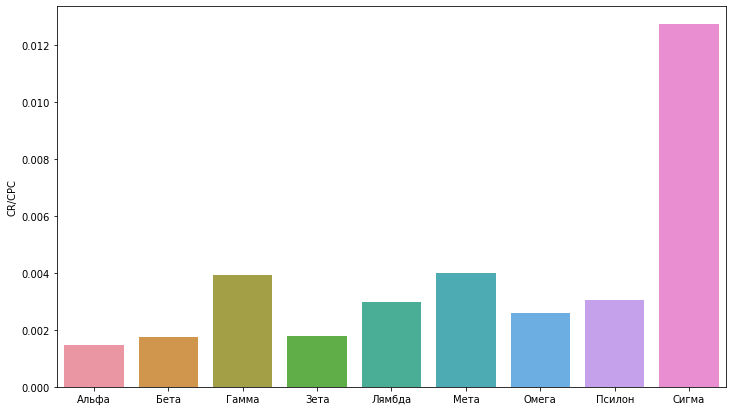

In [ ]:
f, ax = plt.subplots(figsize=(12,7))
sns.barplot(x=list(avg_by_client.index),y=avg_by_client )

### Три лучших и худших клиента согласно метрике CR/CPC

In [ ]:
# Top 3
top3 = ['Сигма', 'Гамма', 'Мета']
# Bottom 3 
bottom3 = ['Альфа', 'Зета', 'Бета']

### Сравнение эффективности 3 лучших клиентов и Омега по типу устройств

### Сравнение эффективности 3 худших клинтов и Омега по типу устройств

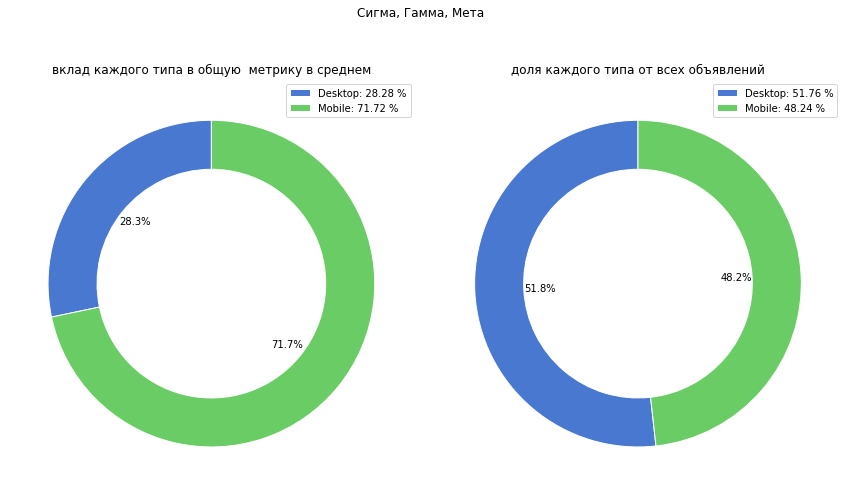

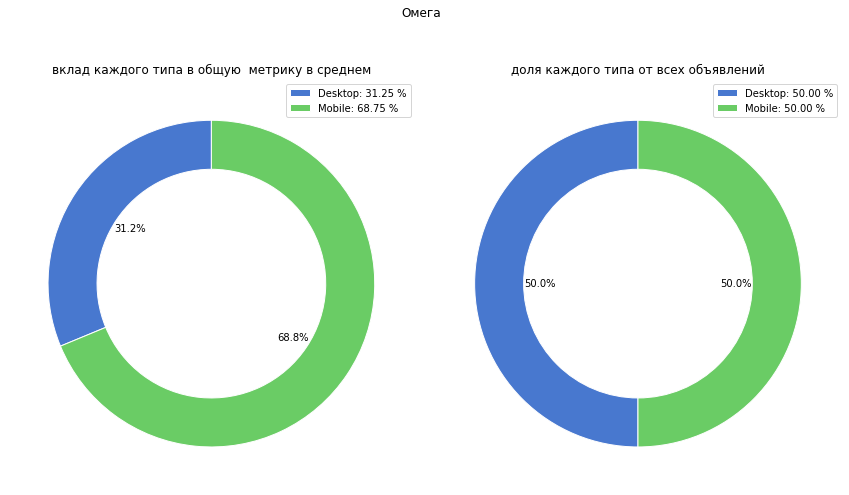

In [ ]:
get_percents(feature='Device', to_include=top3)
get_percents(feature='Device', to_include=['Омега'])

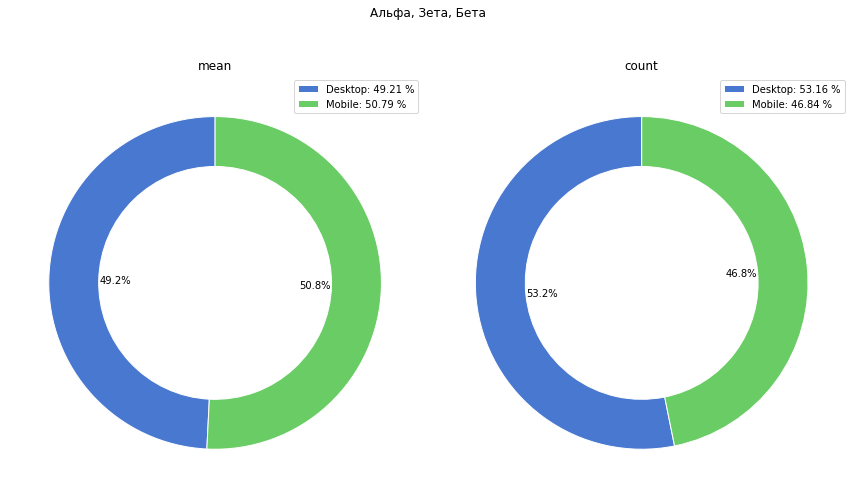

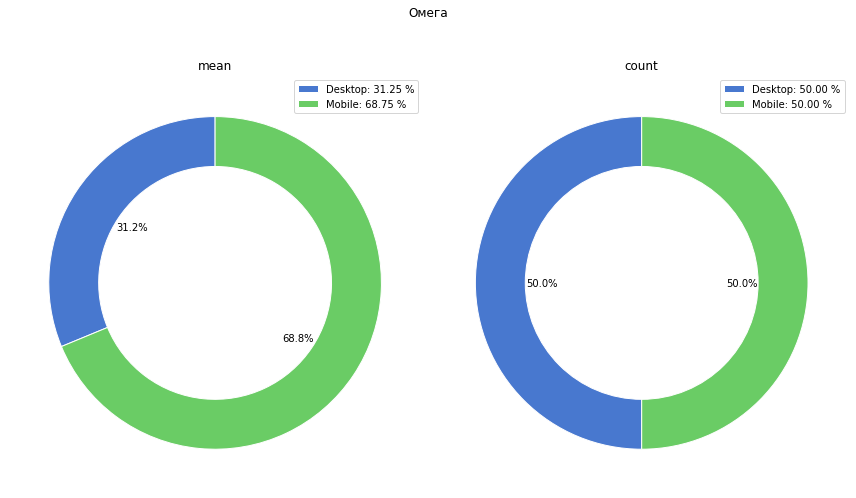

In [ ]:
get_percents(feature='Device', to_include=bottom3)
get_percents(feature='Device', to_include=['Омега'])

### Как видно более эффективным является размещение рекламы на мобильных устройствах

### Сравнение эффективности 3 лучших клиентов и Омега по типу баннера

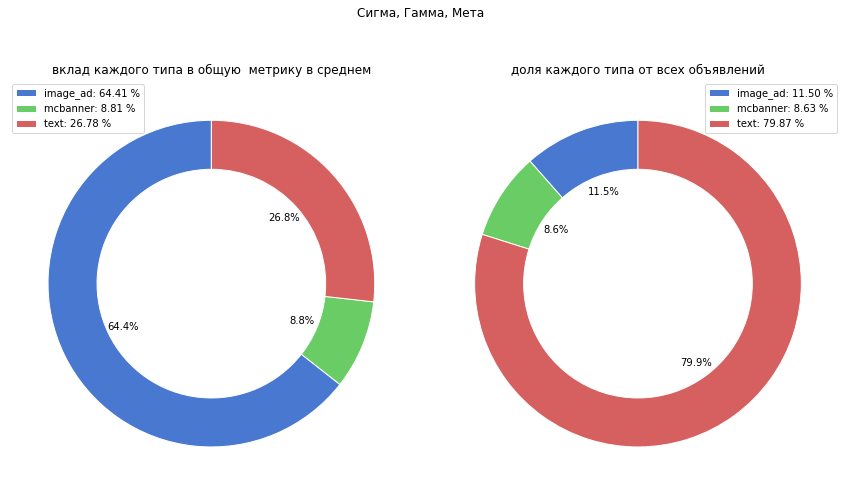

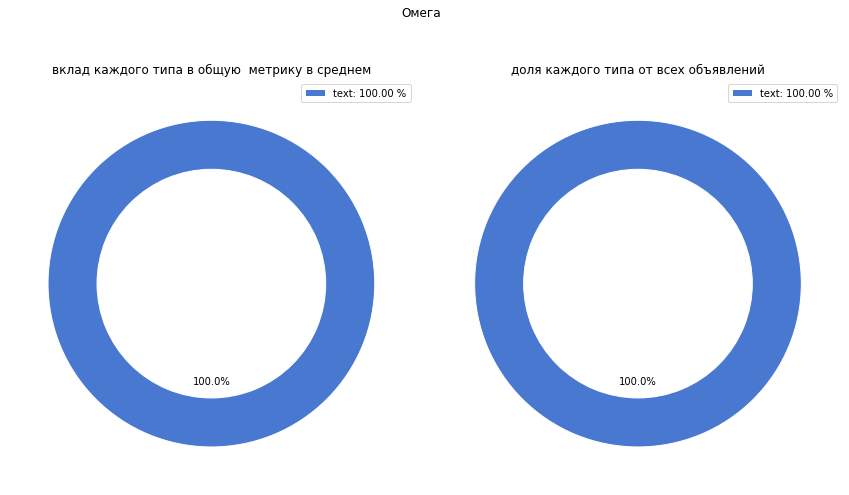

In [ ]:
get_percents(feature='BannerType', to_include=top3)
get_percents(feature='BannerType', to_include=['Омега'])

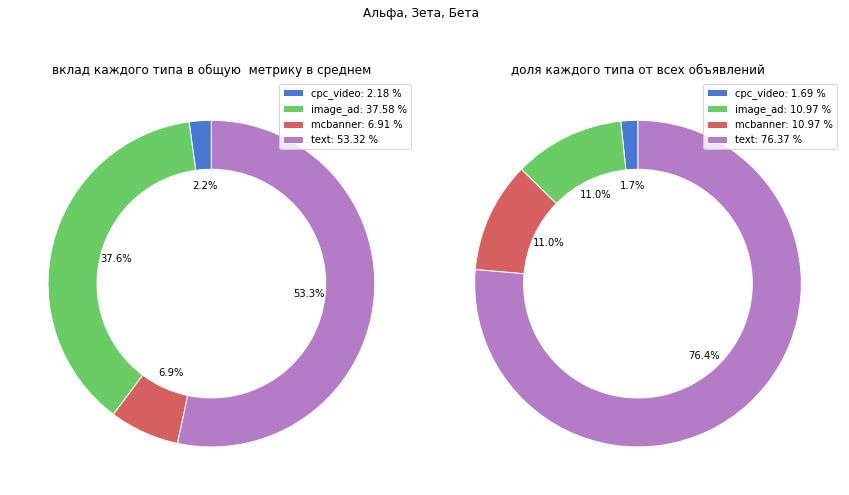

In [ ]:
get_percents(feature='BannerType', to_include=bottom3)

### Текстовая реклама не является самой эффективной. Более продуктивным типом баннера является image ad и mcbanner

### Сравнение эффективности 3 лучших клиентов и Омега по типу таргетинга

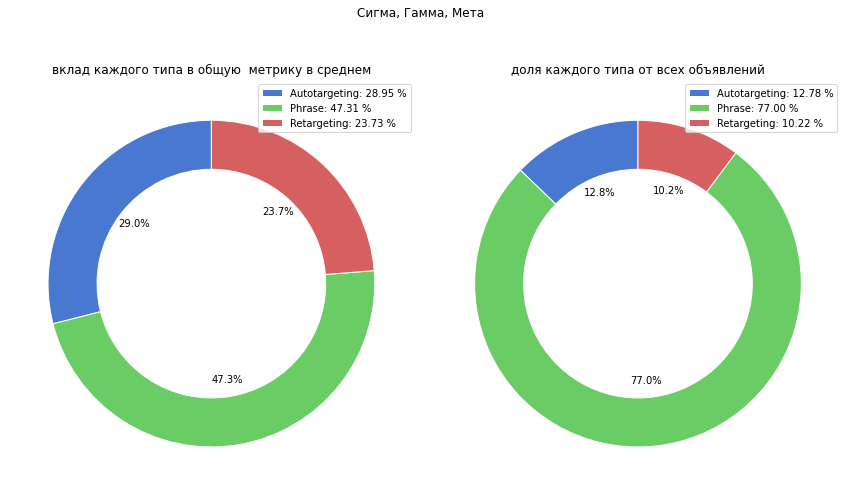

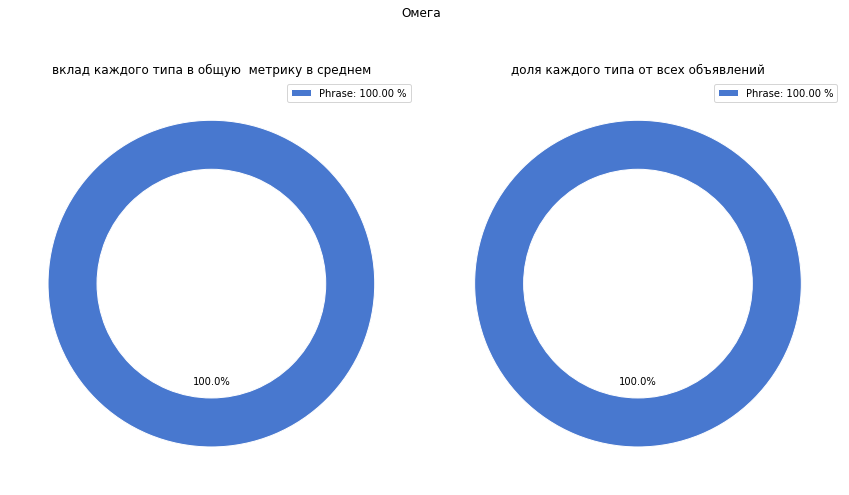

In [ ]:
get_percents(feature='TargetingType', to_include=top3)
get_percents(feature='TargetingType', to_include=['Омега'])

### Сравнение эффективности 3 худших клинтов и Омега по типу таргетинга

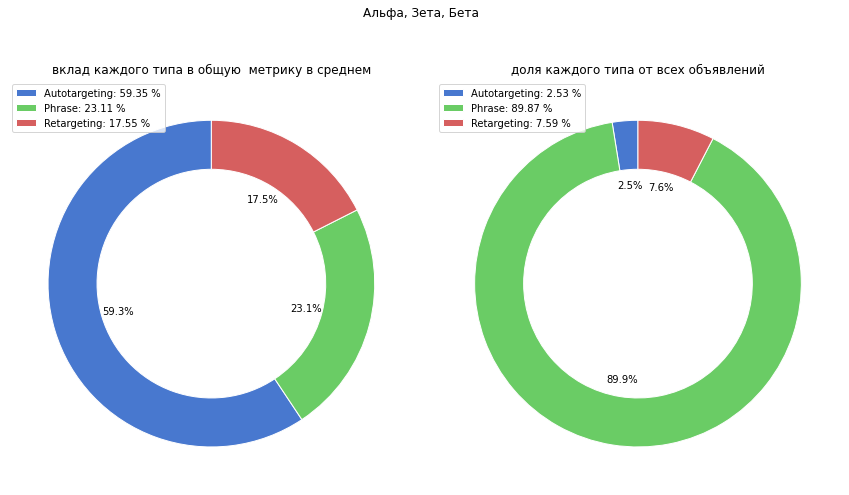

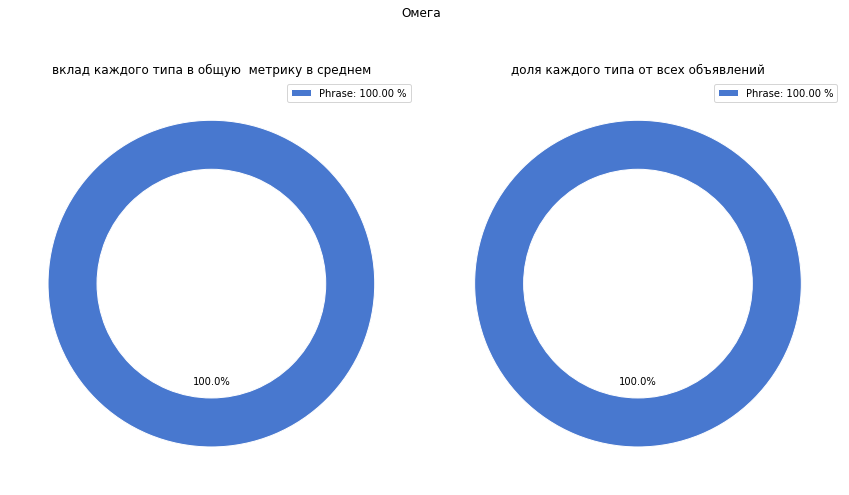

In [ ]:
get_percents(feature='TargetingType', to_include=bottom3)
get_percents(feature='TargetingType', to_include=['Омега'])

### Также, phrase показывает достаточно низкую эффективность. Retargeting и autotargeting являются более эффективными типами таргетинга

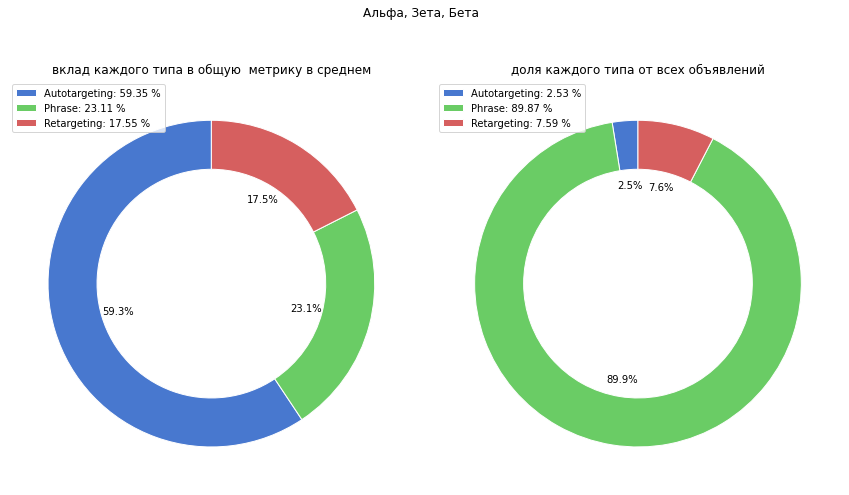

In [ ]:
get_percents(feature='TargetingType', to_include=bottom3)

### Сравнение эффективности 3 “лучших” клиентов по месту расположения рекламы

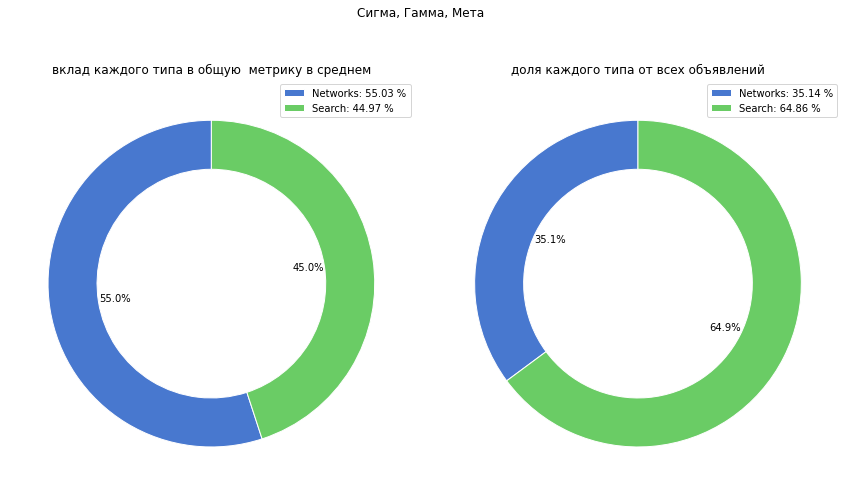

In [ ]:
get_percents(feature='Place', to_include=top3)

### Сравнение эффективности 3 “худших” клиентов по месту расположения рекламы

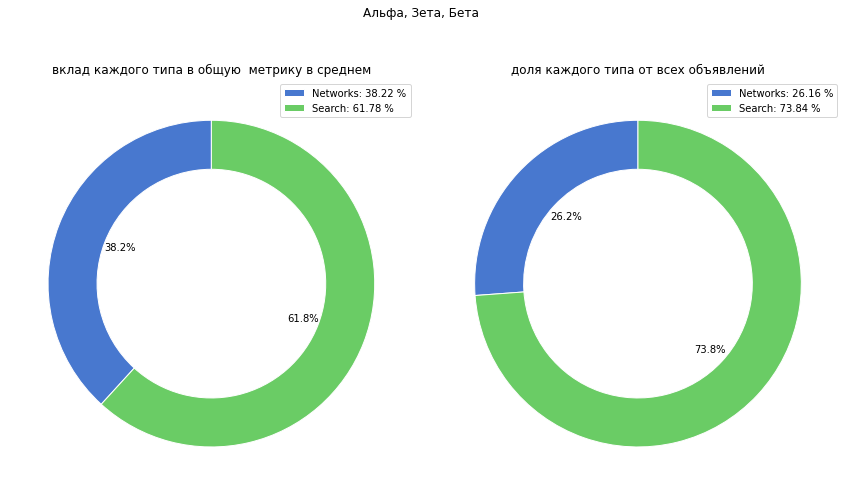

In [ ]:
get_percents(feature='Place', to_include=bottom3)

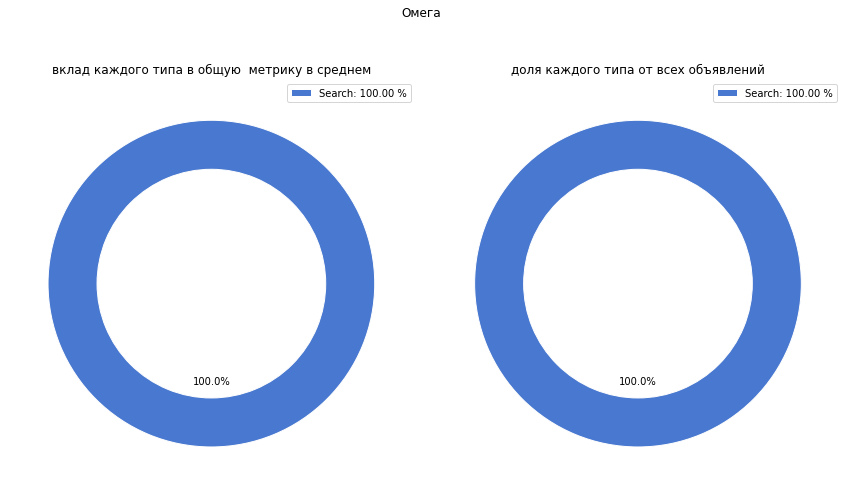

In [ ]:
get_percents(feature='Place', to_include=['Омега'])

### Разница между средними показателями 3  “лучших” и нынешними показателями Омега


In [ ]:
avg_by_client[top3].mean()/avg_by_client['Омега']*100-100

167.30942274411416